In [3]:
! pip install -q torchview
! pip install -q -U graphviz
! pip install transformers
! pip install torch
! pip install accelerate
! pip install SentencePiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.0 MB/s eta 0:00:00


In [4]:
from torchview import draw_graph
from torchvision.models import resnet18, GoogLeNet, densenet, vit_b_16
import graphviz

# when running on VSCode run the below command
# svg format on vscode does not give desired result
graphviz.set_jupyter_format('png')

'svg'

In [8]:
# from transformers import AutoTokenizer, T5ForConditionalGeneration
# import torch

import transformers

tokenizer = transformers.T5Tokenizer.from_pretrained("t5-small")
model = transformers.T5ForConditionalGeneration.from_pretrained("t5-small")

input_ids = tokenizer(
    "translate English to German: The house is wonderful.", return_tensors="pt"
).input_ids

print(input_ids.shape)
labels = tokenizer("Das Haus ist wunderbar.", return_tensors="pt").input_ids
input_data = {
    'input_ids': input_ids.to('meta'),
    'labels': labels.to('meta'),
}

model_graph = draw_graph(model, input_data=input_data, device='meta')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


torch.Size([1, 11])


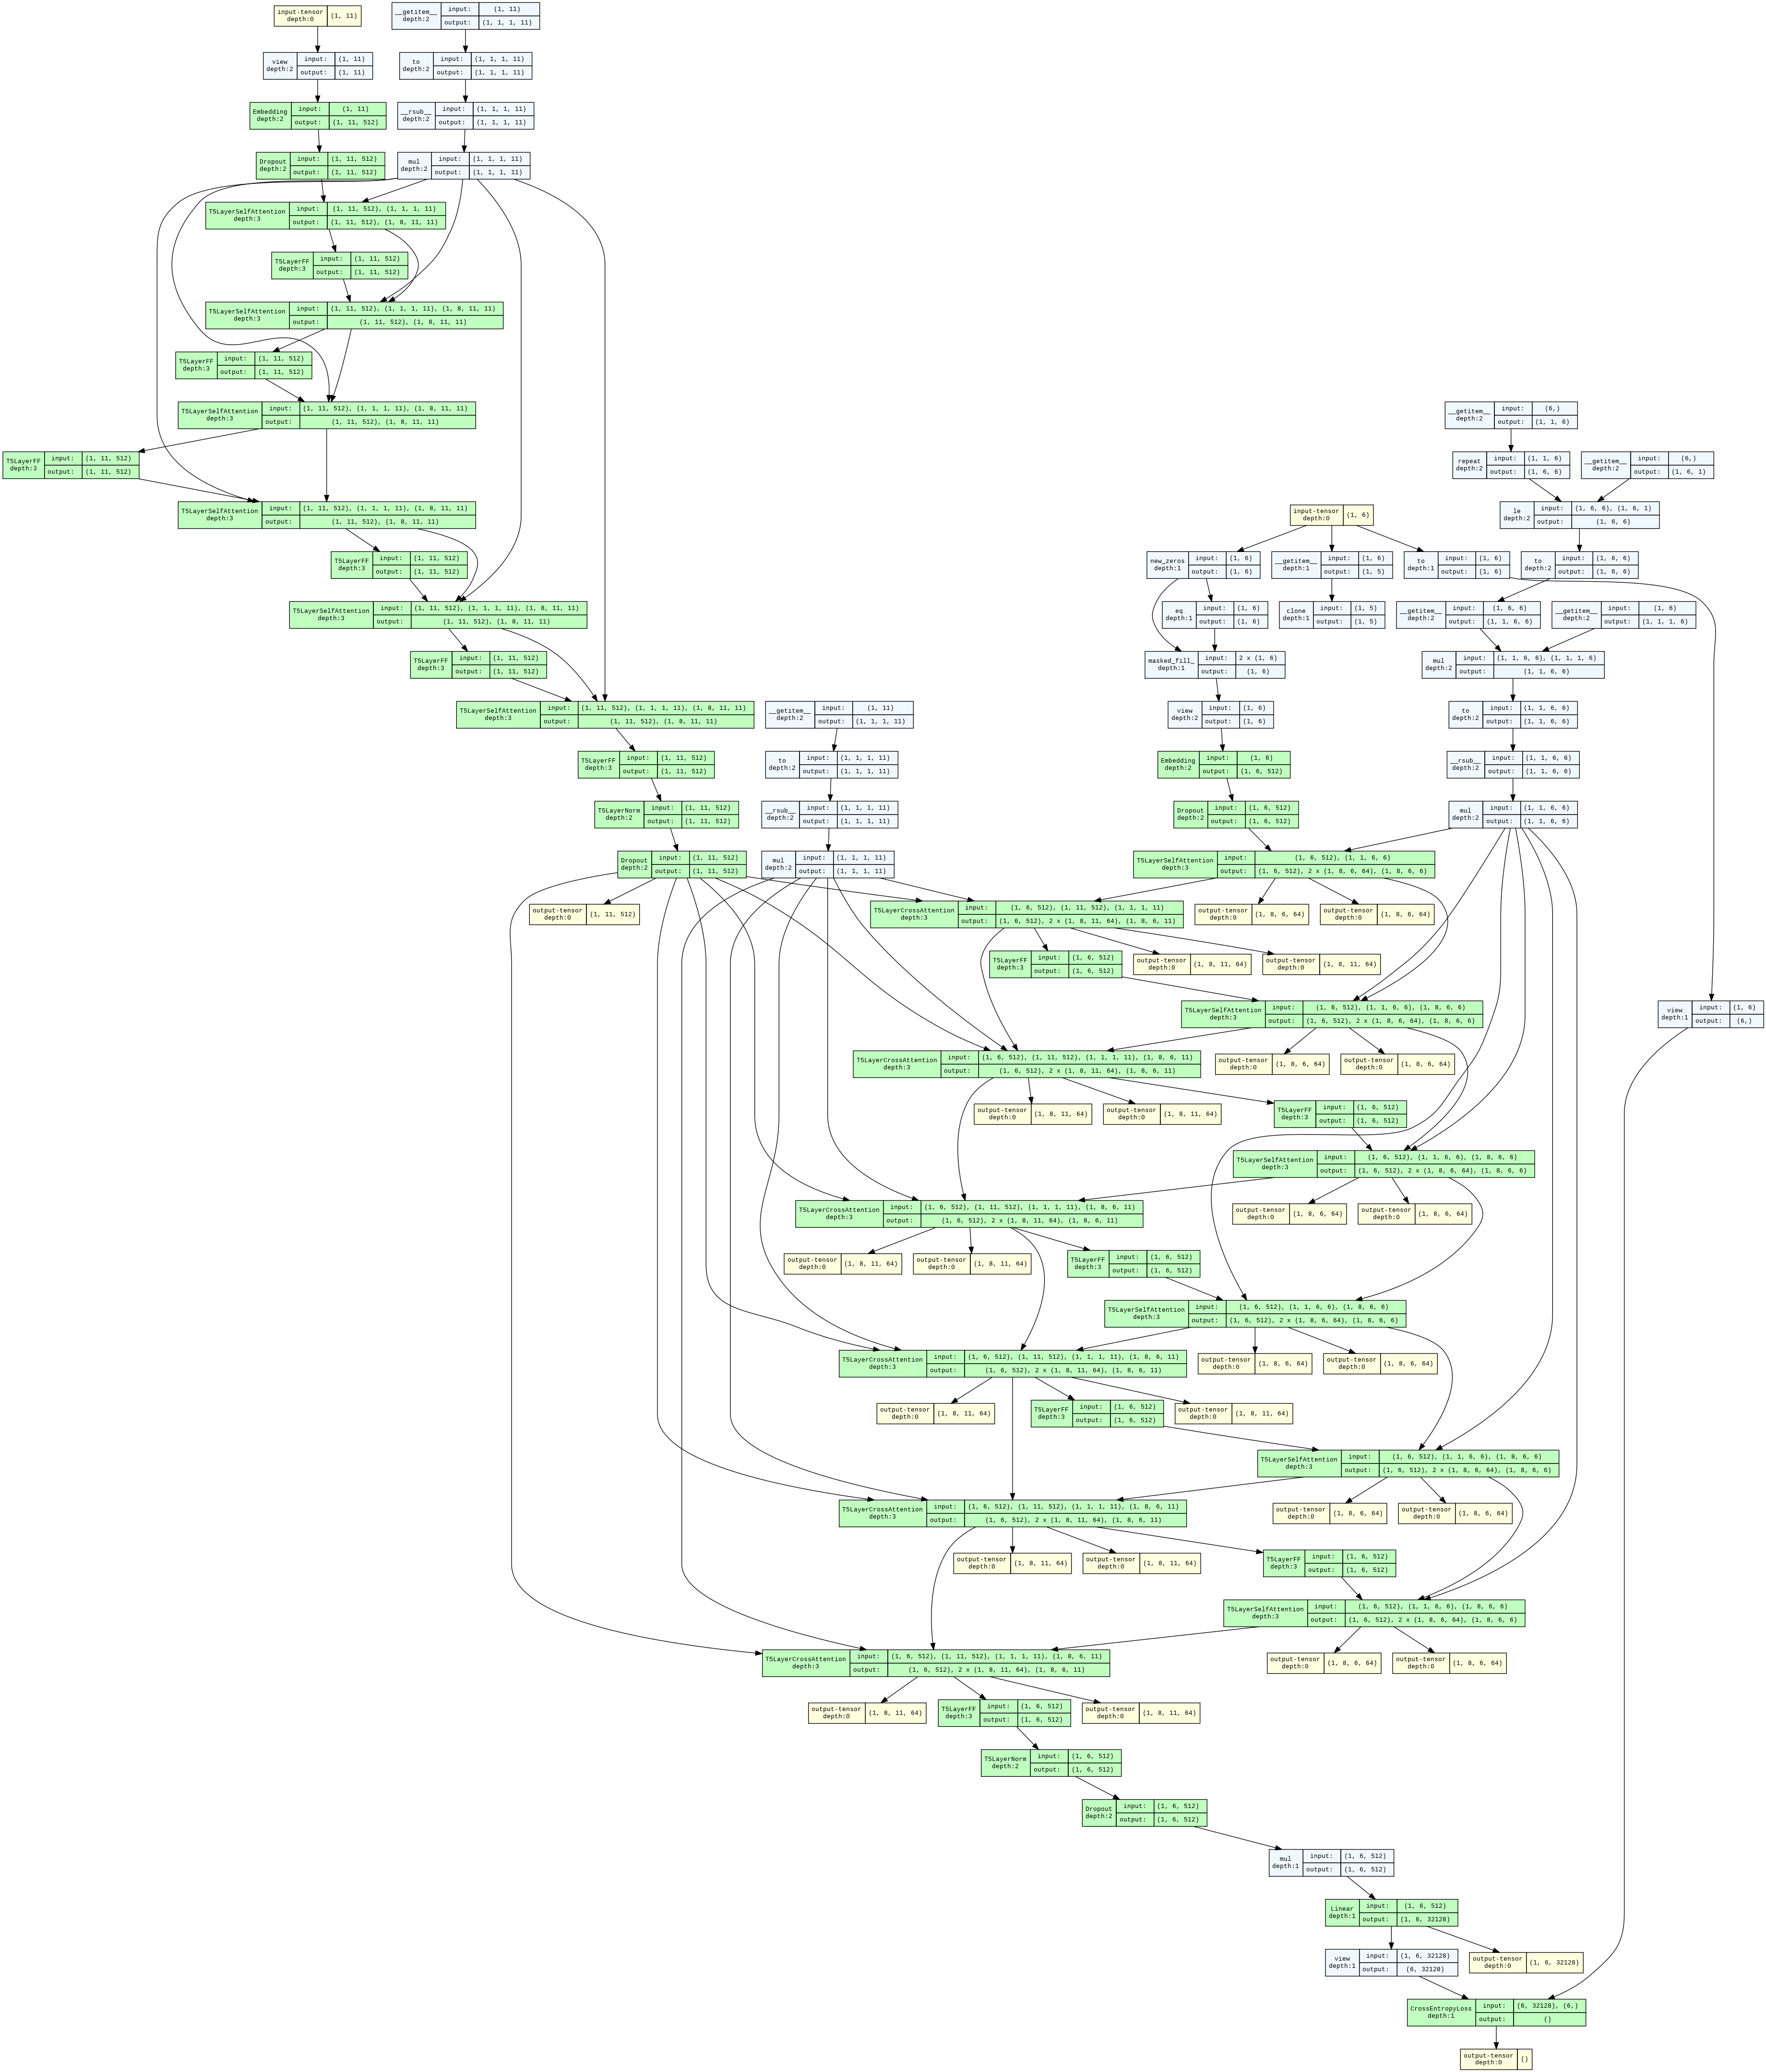

In [6]:
model_graph.visual_graph